In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
trainset='/content/drive/MyDrive/Anh AI/train'
validationset='/content/drive/MyDrive/Anh AI/validation'
train=ImageDataGenerator(rescale=1/255.0)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.99)

In [ ]:
train_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 61 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [ ]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'no': 0, 'yes': 1}
{'no': 0, 'yes': 1}


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='Softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 784)               52920784  
                                                                 
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 53,323,730
Trainable params: 53,323,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(train_data,batch_size=10,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/10
7/7 [==============================] - 55s 8s/step - loss: 39.7527 - accuracy: 0.7213 - val_loss: 23.2882 - val_accuracy: 0.7308
Epoch 2/10
7/7 [==============================] - 18s 3s/step - loss: 20.1704 - accuracy: 0.6721 - val_loss: 16.0406 - val_accuracy: 0.2692
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 7.0005 - accuracy: 0.6230 - val_loss: 6.7086 - val_accuracy: 0.8077
Epoch 4/10
7/7 [==============================] - 19s 3s/step - loss: 6.4690 - accuracy: 0.7869 - val_loss: 1.1746 - val_accuracy: 0.8462
Epoch 5/10
7/7 [==============================] - 18s 3s/step - loss: 3.2632 - accuracy: 0.8361 - val_loss: 1.3441e-04 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 18s 3s/step - loss: 0.6660 - accuracy: 0.9016 - val_loss: 1.4788e-05 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 22s 3s/step - loss: 1.7644 - accuracy: 0.8689 - val_loss: 0.5220 - val_accuracy: 0.9231
Epoch 8/10
7/7 [======

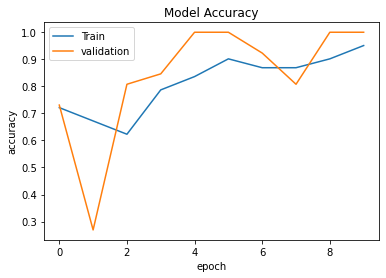

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/BT AI/FaceID.h5')


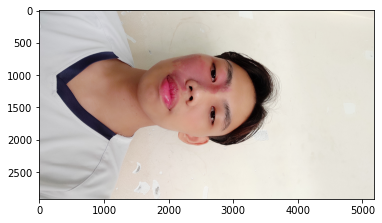

In [ ]:
url='/content/drive/MyDrive/Anh AI/train/yes/IMG_20220508_163408.jpg'
plt.imshow(load_img(url))


In [ ]:
img=load_img('/content/drive/MyDrive/Anh AI/train/yes/IMG_20220508_163408.jpg',target_size=(150,150))
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)

array([1])